In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # here with this code we split the dataset into two categories
from sklearn.svm import SVC # the algorithm here is SVM
import tensorflow as tf
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [62]:
Data=pd.read_csv("Desktop/BRCA.csv")
Data.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [63]:
print(Data.isnull().sum()) 
# here we must examine if there is null item, and by using sum() it gives us total amount in each column

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64


In [64]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [65]:
Data1=Data.dropna()
Data1.info() # here the outcomes show the columns with no null, the main point is giving name Data2 is obligatory
print(Data1.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float

In [66]:
print(Data1.Gender.value_counts()) # by using this code we access the category of items in each column

FEMALE    313
MALE        4
Name: Gender, dtype: int64


In [67]:
satage=print(Data1["Tumour_Stage"].value_counts()) #print(Data.Tumour_Stage.value_counts())

II     180
III     77
I       60
Name: Tumour_Stage, dtype: int64


In [68]:
ER=print(Data1["ER status"].value_counts())
percentage1=Data1['ER status'].value_counts(normalize=True) * 100 # here at first I wrote ( percentage= print (.....command...))
# but it caused error for plotting because it could not find the numerical amount

Positive    317
Name: ER status, dtype: int64


In [69]:
PR=print(Data1["PR status"].value_counts())
percentage2=Data1['PR status'].value_counts(normalize=True) * 100

Positive    317
Name: PR status, dtype: int64


In [70]:
HER2=print(Data1["HER2 status"].value_counts())
percentage3=Data1['HER2 status'].value_counts(normalize=True) * 100

Negative    288
Positive     29
Name: HER2 status, dtype: int64


In [71]:
Data1['Age'].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,
            ...
            324, 325, 326, 327, 328, 329, 330, 331, 332, 333],
           dtype='int64', length=317)

In [72]:
percentage4 = Data1['Age'].value_counts(normalize=True) * 100
percentage=np.sort(percentage4)
min(percentage4)
percentage4=percentage4.to_numpy()
print(percentage4)

[4.7318612  4.41640379 4.10094637 3.78548896 3.78548896 3.47003155
 3.15457413 3.15457413 3.15457413 2.83911672 2.83911672 2.83911672
 2.52365931 2.52365931 2.52365931 2.52365931 2.52365931 2.52365931
 2.20820189 1.89274448 1.89274448 1.89274448 1.89274448 1.89274448
 1.89274448 1.89274448 1.57728707 1.57728707 1.57728707 1.57728707
 1.26182965 1.26182965 1.26182965 1.26182965 0.94637224 0.94637224
 0.94637224 0.94637224 0.94637224 0.94637224 0.94637224 0.94637224
 0.94637224 0.94637224 0.63091483 0.63091483 0.63091483 0.63091483
 0.63091483 0.63091483 0.63091483 0.31545741 0.31545741 0.31545741
 0.31545741 0.31545741 0.31545741]


In [73]:
Zero_elements=np.where(percentage4<1)
print(Zero_elements)

(array([34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56], dtype=int64),)


In [74]:
elements=np.delete(percentage4, np.where(percentage4<=2)) # the main point here is using np.array! at first I was trying to
# delet percentage < 1 but I did not pay attention to the type of data! it was series
print(elements)
type(percentage4)
type(elements) # here it is an np.array for plotting in Pie chart we need series
series = pd.Series(elements)
type(series)
print(series)

[4.7318612  4.41640379 4.10094637 3.78548896 3.78548896 3.47003155
 3.15457413 3.15457413 3.15457413 2.83911672 2.83911672 2.83911672
 2.52365931 2.52365931 2.52365931 2.52365931 2.52365931 2.52365931
 2.20820189]
0     4.731861
1     4.416404
2     4.100946
3     3.785489
4     3.785489
5     3.470032
6     3.154574
7     3.154574
8     3.154574
9     2.839117
10    2.839117
11    2.839117
12    2.523659
13    2.523659
14    2.523659
15    2.523659
16    2.523659
17    2.523659
18    2.208202
dtype: float64


In [75]:
Data2=np.sort(Data1['Age'].values)
# Assuming your dataset is stored in a pandas DataFrame called 'df' and the column of interest is named 'column_name':
percentage = Data1['Tumour_Stage'].value_counts(normalize=True) * 100
print(percentage)
type(percentage)

II     56.782334
III    24.290221
I      18.927445
Name: Tumour_Stage, dtype: float64


pandas.core.series.Series

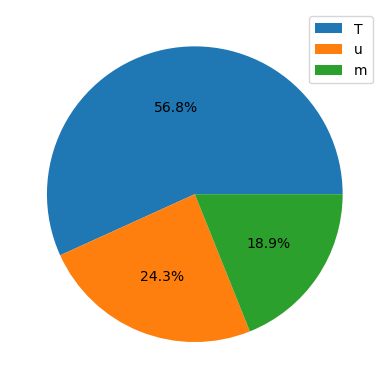

In [76]:
size=percentage 
# size indicates the pecentage for plt.pie! but i want to show the percentage of each age such as 29 approximately 10%

plt.pie(size,autopct='%1.1f%%')
plt.legend("Tumour_Stage")
plt.show()

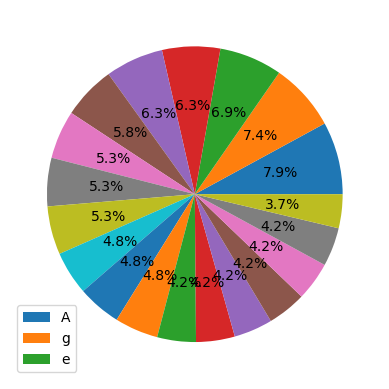

In [77]:
size=series
plt.pie(size,autopct='%1.1f%%')
plt.legend("Age")
plt.show()
# here the problem is deleting the percentage smaller than 2! thus it added up the deleted amount to others regarding to formula
# the sum of amounts must be 100!

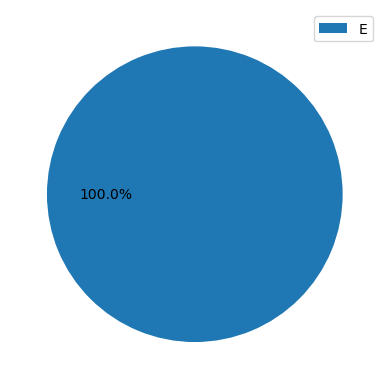

In [78]:
size=percentage1
plt.pie(size,autopct='%1.1f%%')
plt.legend("ER status")
plt.show()

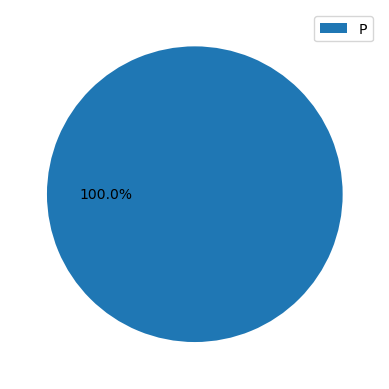

In [79]:
size=percentage2
plt.pie(size,autopct='%1.1f%%')
plt.legend("PR status")
plt.show()

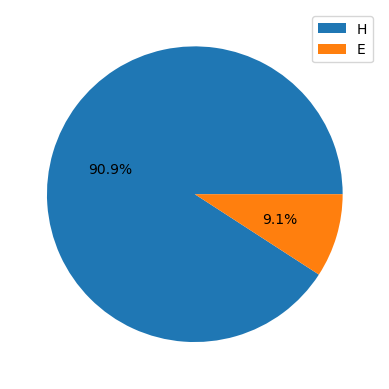

In [80]:
size=percentage3
plt.pie(size,autopct='%1.1f%%')
plt.legend("HER2 status")
plt.show()

In [81]:
# map() works with function and values directly! the problem was running from beginning to the end! each time one value was replaced
#with a new value i had to run it from beginning to the end.

vals_to_replace={"I":1, "II":2, "III":3}
Data1['Tumour_Stage']=Data1["Tumour_Stage"].map(vals_to_replace)
vals_to_replace={"Infiltrating Ductal Carcinoma":1,"Infiltrating Lobular Carcinoma":2,"Mucinous Carcinoma":3}
Data1['Histology']=Data1["Histology"].map(vals_to_replace)
vals_to_replace={"Positive":1}
Data1['ER status']=Data1["ER status"].map(vals_to_replace)
vals_to_replace={"Positive":1}
Data1['PR status']=Data1["PR status"].map(vals_to_replace)
vals_to_replace={"positive":1,"Negative":0}
Data1['HER2 status']=Data1["HER2 status"].map(vals_to_replace)
vals_to_replace={"MALE":1,"FEMALE":0} # must pay atention to the letters if they are cpital or small! I did not used the carect 
# spelling and the result was NaN!
Data1['Gender']=Data1["Gender"].map(vals_to_replace)
vals_to_replace={"Other":1,"Modified Radical Mastectomy":2," Lumpectomy":3,"Simple Mastectomy":4}
Data1['Surgery_type']=Data1["Surgery_type"].map(vals_to_replace)
#vals_to_replace={"Alive":1,"Dead":0}
#Data1['Patient_Status']=Data1["Patient_Status"].map(vals_to_replace)

Data1

C:\Users\fujitsuu\AppData\Local\Temp\ipykernel_448\3571553278.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data1['Tumour_Stage']=Data1["Tumour_Stage"].map(vals_to_replace)
C:\Users\fujitsuu\AppData\Local\Temp\ipykernel_448\3571553278.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data1['Histology']=Data1["Histology"].map(vals_to_replace)
C:\Users\fujitsuu\AppData\Local\Temp\ipykernel_448\3571553278.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,0,0.080353,0.42638,0.54715,0.273680,3,1,1,1,0.0,2.0,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,0,-0.420320,0.57807,0.61447,-0.031505,2,3,1,1,0.0,NaN,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,0,0.213980,1.31140,-0.32747,-0.234260,3,1,1,1,0.0,1.0,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,0,0.345090,-0.21147,-0.19304,0.124270,2,1,1,1,0.0,2.0,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,0,0.221550,1.90680,0.52045,-0.311990,2,1,1,1,0.0,1.0,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36.0,0,0.231800,0.61804,-0.55779,-0.517350,3,1,1,1,NaN,4.0,11-Nov-19,09-Feb-20,Dead
330,TCGA-A8-A085,44.0,1,0.732720,1.11170,-0.26952,-0.354920,2,2,1,1,0.0,1.0,01-Nov-19,04-Mar-20,Dead
331,TCGA-A1-A0SG,61.0,0,-0.719470,2.54850,-0.15024,0.339680,2,1,1,1,0.0,NaN,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79.0,0,0.479400,2.05590,-0.53136,-0.188480,1,1,1,1,NaN,NaN,21-Nov-19,19-Feb-21,Dead


In [87]:
Data1=Data1.fillna(0) #because model.fit() doesn't work when NaN features exist. Here handelling is not professional and reasonable
# for handelling the missing data we should use reasonable methods!
Data1

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,0,0.080353,0.42638,0.54715,0.273680,3,1,1,1,0.0,2.0,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,0,-0.420320,0.57807,0.61447,-0.031505,2,3,1,1,0.0,0.0,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,0,0.213980,1.31140,-0.32747,-0.234260,3,1,1,1,0.0,1.0,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,0,0.345090,-0.21147,-0.19304,0.124270,2,1,1,1,0.0,2.0,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,0,0.221550,1.90680,0.52045,-0.311990,2,1,1,1,0.0,1.0,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36.0,0,0.231800,0.61804,-0.55779,-0.517350,3,1,1,1,0.0,4.0,11-Nov-19,09-Feb-20,Dead
330,TCGA-A8-A085,44.0,1,0.732720,1.11170,-0.26952,-0.354920,2,2,1,1,0.0,1.0,01-Nov-19,04-Mar-20,Dead
331,TCGA-A1-A0SG,61.0,0,-0.719470,2.54850,-0.15024,0.339680,2,1,1,1,0.0,0.0,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79.0,0,0.479400,2.05590,-0.53136,-0.188480,1,1,1,1,0.0,0.0,21-Nov-19,19-Feb-21,Dead


In [83]:
#splitting Data
X=Data1[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 
                   'Tumour_Stage', 'Histology', 'ER status', 'PR status', 
                   'HER2 status', 'Surgery_type']] 
Y=Data1[["Patient_Status"]] #aaaauch! the point was using "np.array([[names of columns!]])" it raised ERROR! the correct form is 
# using the form presented above! 
Xtrain, Xtest, Ytrain, Ytest= train_test_split(X,Y, test_size=0.20, random_state=45)
model = SVC()
model.fit(Xtrain, Ytrain)

C:\anaconda\ghazal\envs\pyghazali\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [84]:
# prediction
features = np.array([[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1, 1, 2, 2,]])
print(model.predict(features))

['Alive']


C:\anaconda\ghazal\envs\pyghazali\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
WELL DONE GHAZAL ! YOU FINDE OUT SOME POINTS UPON YOUR CONSISTANCY!